<a href="https://colab.research.google.com/github/jcbdoliveira/desafrio_de_projeto_unimed-bh_pandas/blob/main/Desafio_de_projeto_Unimed_BH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Olá, este projeto de treino tem como objetivo explorar uma base de dados de vendas.
Os dados foram obitidos do site [Kaggle](https://www.kaggle.com/datasets). Este site prôve vários dataset de dados abertos que são uma ótima opção de treino e aperfeiçoamento de habilidades.
Neste projeto vou analisar as vendas de produtos, segmentando por clientes, grupos e categorias.

**Roteiro da análise:**

1.   Definir escopo, para saber as linhas e colunas
2.   Testar a base para encontar dados nulos e tratar se necessário
3.   Remover colunas desnecessárias
4.   Analisar campos chaves da tabela para evitar distorções e análise falha.
5.   Identificar o período de tempo para análise
6.   Responder as questões abaixo:
     *   Qual faturamento total
     *   Qual faturamento por ano
     *   Qual faturamento por: estado, cidade e região
     *   Qual custo de nvio por tipo
     *   Prazo médio de envio
     *   Margem de contribuição da venda por estado, cidade e região
     *   Top 10 produtos vendidos em quantidade e venda
     *   



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv("sales.csv")


1.   Definir escopo, para saber as linhas e colunas

In [37]:
#Método utilizado para mostrar os primeiros registros da base
df.head()

,Unnamed: 0,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,...,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio
0,0,674,4706,2012-12-28,Não Especificada,30,2116.70,0.02,Aéreo Normal,488.818,...,Pernambuco,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Capas e Acessórios,Catalog Binders with Expanding Posts,Small Box,0.40,2012-12-30
1,1,816,5891,2012-12-28,Média,2,44.45,0.01,Aéreo Normal,-17.457,...,Paraíba,Nordeste,Brasil,Escritório em Casa,Material de Escritório,Capas e Acessórios,Avery Legal 4-Ring Binder,Small Box,0.35,2012-12-30
2,2,1876,13507,2012-12-29,Média,27,176.10,0.09,Aéreo Normal,-75.710,...,Pará,Norte,Brasil,Pequenas Empresas,Material de Escritório,Papel,Strathmore Photo Mount Cards,Small Box,0.39,2012-12-30
3,3,3583,25542,2012-12-30,Baixa,37,257.46,0.09,Aéreo Rápido,-18.660,...,Goiás,Centro-Oeste,Brasil,Escritório em Casa,Material de Escritório,Papel,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",Wrap Bag,0.39,2012-12-30
4,4,4008,28611,2012-12-27,Baixa,30,15337.58,0.10,Aéreo Normal,6670.409,...,São Paulo,Sudeste,Brasil,Consumidor,Material de Escritório,Capas e Acessórios,GBC DocuBind 300 Electric Binding Machine,Small Box,0.37,2012-12-30


In [38]:
#Utilizado para ler as quantidades de linha e coluna
df.shape

(8399, 25)

In [39]:
#Apresenta uma lista dos campos 
df.dtypes

Unnamed: 0                    int64
Row ID                        int64
Order ID                      int64
Data da Venda                object
Prioridade                   object
Quantidade                    int64
Valor da Venda              float64
Desconto                    float64
Forma de Envio               object
Lucro                       float64
Preço Unitário              float64
Custo de Envio              float64
Nome do Cliente              object
Cidade                       object
CEP                           int64
Estado                       object
Região                       object
País                         object
Segmento do Cliente          object
Categoria do Produto         object
Sub-Categoria do Produto     object
Nome do Produto              object
Embalagem                    object
Margem                      float64
Data de Envio                object
dtype: object

2.   Testar a base para encontar dados nulos e tratar se necessário

In [40]:
#verificando valores nulos
df.isnull().sum()

Unnamed: 0                   0
Row ID                       0
Order ID                     0
Data da Venda                0
Prioridade                   0
Quantidade                   0
Valor da Venda               0
Desconto                     0
Forma de Envio               0
Lucro                        0
Preço Unitário               0
Custo de Envio               0
Nome do Cliente              0
Cidade                       0
CEP                          0
Estado                       0
Região                       0
País                         0
Segmento do Cliente          0
Categoria do Produto         0
Sub-Categoria do Produto     0
Nome do Produto              0
Embalagem                    0
Margem                      63
Data de Envio                0
dtype: int64

In [41]:
#Substituindo os valores nulos pela média
df["Margem"].fillna(df["Margem"].mean(), inplace=True)

3.   Remover colunas desnecessárias

In [42]:
#Removendo colunas não utilizdas na análise
colunas_par_remocao = ["Unnamed: 0","Row ID", "Order ID", "Prioridade"]
df = df.drop(columns=colunas_par_remocao)

4.   Analisar campos chaves da tabela para evitar distorções e análise falha.

In [43]:
#Validando as colunas "valora da Venda" e (quantidade * Preço unitário)"
#Se verdadeiro utilizamos coluna "valor da venda", caso contrário atualizamos os valores
if not (df["Valor da Venda"].sum() == (df["Quantidade"].mul(df["Preço Unitário"])).sum()):
  df["Valor da Venda"] = (df["Quantidade"] * df["Preço Unitário"])

In [44]:
#Analisando a coluna lucro
#A coluna "Margem" representa a margem de lucro  obtido na venda.
#Desta forma  podemos validar a coluna comparando com a coluna  "Valor da Venda" multiplicado pela caoluna "Margem"
#Se valores de amostra diferentes atualizamos o valor da coluna Lucro
(df["Lucro"] == df["Valor da Venda"].mul(df["Margem"])).sample(10)


7176    False
870     False
8261    False
2707    False
6880    False
6248    False
4200    False
3034    False
5781    False
4012    False
dtype: bool

In [45]:
#O resultado foi que a coluna "Lucro" não representa o valor esperado.
#Vamos corrigir a coluna com valores novos
df["Lucro"] = (df["Valor da Venda"].mul(df["Margem"]))

In [46]:
#Refazendo análise da coluna "Lucro"
(df["Lucro"] == (df["Valor da Venda"] * df["Margem"])).sample(10)

2562    True
1195    True
445     True
2472    True
7169    True
7050    True
666     True
6855    True
6076    True
1193    True
dtype: bool

In [73]:
#Para finalizar o campo "Lucro" vamos decontar o "Custo de Envio"
df["Lucro"] = (df["Lucro"] - df["Custo de Envio"])

5.   Identificar o período de tempo para análise


In [47]:
df["Data da Venda"].min()

'2009-01-01'

In [48]:
df["Data da Venda"].max()

'2012-12-30'

In [52]:
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"], errors="ignore")

 *   Qual faturamento total

In [49]:
df["Valor da Venda"].sum()

15507174.95

*   Qual faturamento por ano

In [53]:
df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].sum()

Data da Venda
2009    4355149.59
2010    3685916.16
2011    3597484.15
2012    3868625.05
Name: Valor da Venda, dtype: float64

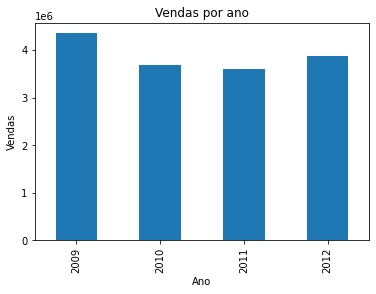

In [58]:
df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].sum().plot.bar(title='Vendas por ano')
plt.xlabel("Ano")
plt.ylabel("Vendas");

*   Qual faturamento por: estado, cidade e região

In [60]:
df.groupby(df["Estado"])['Valor da Venda'].sum().sort_values(ascending=False)

Estado
Goiás                  2952044.42
São Paulo              2230965.72
Pernambuco             1496889.09
Paraná                 1345470.09
Rio Grande do Sul      1251533.10
Mato Grosso do Sul      836205.92
Espírito Santo          705175.50
Santa Catarina          688143.60
Bahia                   650522.06
Mato Grosso             469240.80
Minas Gerais            372294.41
Piauí                   342277.94
Paraíba                 331935.71
Alagoas                 263751.21
Rio Grande do Norte     249471.83
Tocantins               242414.13
Rio de Janeiro          238693.80
Sergipe                 235666.48
Distrito Federal        194816.72
Maranhão                160593.90
Amazonas                107917.91
Pará                     87540.93
Ceará                    53609.68
Name: Valor da Venda, dtype: float64

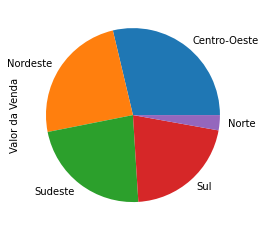

In [72]:
df.groupby(df["Região"])['Valor da Venda'].sum().sort_values(ascending=False).plot.pie();

In [69]:
df.groupby([df["Região"], df["Estado"], df["Cidade"]])['Valor da Venda'].sum()

Região        Estado               Cidade             
Centro-Oeste  Distrito Federal     Brasília                194816.72
              Goiás                Alexânia                128969.03
                                   Anápolis                997322.99
                                   Caldas Novas             26885.00
                                   Corumbá de Goiás        124119.04
                                   Formosa                 577161.49
                                   Goianésia               220740.27
                                   Goiânia                 651706.88
                                   Novo Gama               225139.72
              Mato Grosso          Cuiabá                  469240.80
              Mato Grosso do Sul   Campo Grande            486686.02
                                   Douradina               135905.51
                                   Eldorado                148626.95
                                   Fátima do Sul

In [ ]:
#Para finalizar o campo "Lucro" vamos decontar o "Custo de Envio"
df["Lucro"] = (df["Lucro"] - df["Custo de Envio"])

In [ ]:
df["Lucro"].head()

0     787.3700
1      13.1960
2      65.2134
3     100.8204
4    5818.3880
Name: Lucro, dtype: float64

1.0 Pergunta a ser respondida, qual é a venda total?

In [ ]:
df.head()

Criar curva abc
Criar percentual por estado, produtos
Criar método de envio mais usado

15507174.95